In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
train_data[0].shape

(28, 28)

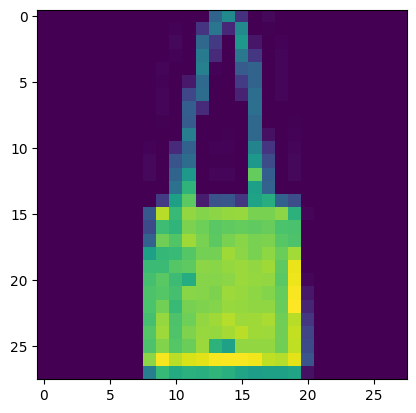

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[200])
plt.show()

In [ ]:
train_labels[200]

8

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

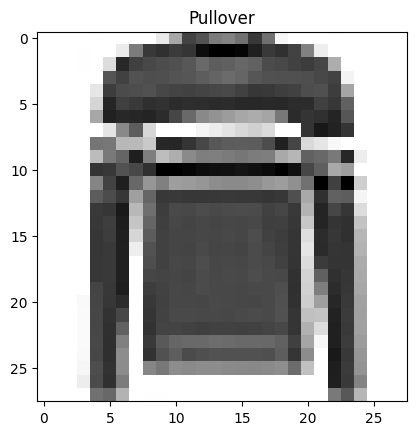

In [ ]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]])
plt.show()

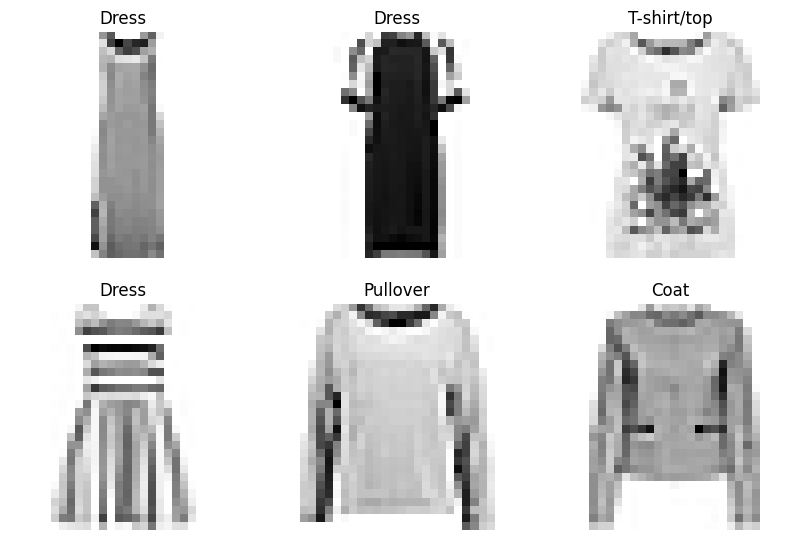

In [ ]:
import random
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 3, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model Creation

In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

non_norm_history = model.fit(train_data, train_labels, epochs=10, 
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.3472 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [26]:
import pandas as pd

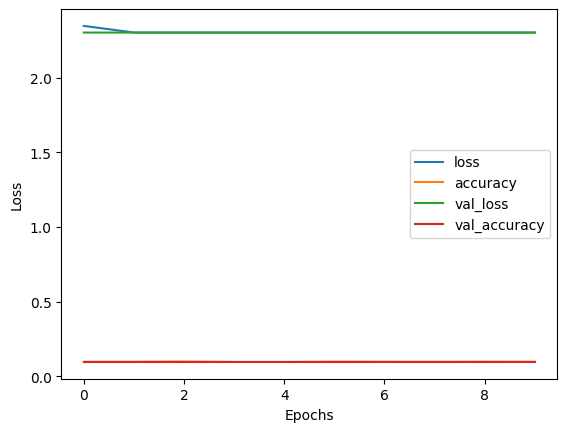

In [29]:
pd.DataFrame(non_norm_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [35]:
train_data.min(), train_data.max()

(0, 255)

In [36]:
train_data = train_data/255.0
test_data = test_data/255.0

In [37]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="SparseCategoricalCrossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

norm_history = model.fit(train_data, train_labels, epochs=10, 
                         validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2627 - accuracy: 0.5750 - val_loss: 0.9513 - val_accuracy: 0.6896
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8274 - accuracy: 0.7326 - val_loss: 0.7576 - val_accuracy: 0.7501
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6940 - accuracy: 0.7653 - val_loss: 0.6861 - val_accuracy: 0.7649
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6290 - accuracy: 0.7814 - val_loss: 0.6325 - val_accuracy: 0.7788
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5891 - accuracy: 0.7949 - val_loss: 0.6190 - val_accuracy: 0.7878
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5668 - accuracy: 0.8077 - val_loss: 0.6161 - val_accuracy: 0.7898
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5528 - accuracy: 0.8139 - val_loss: 0.6023 - val_accuracy:

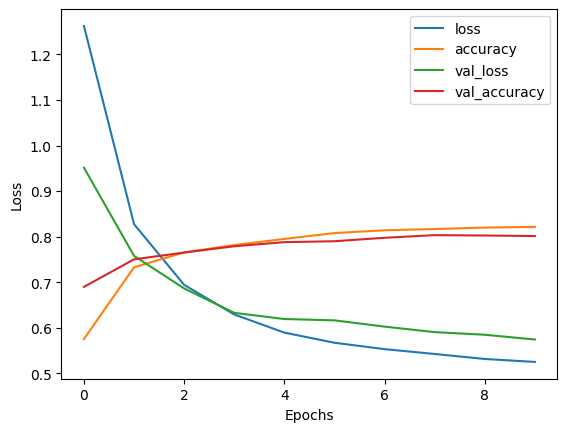

In [38]:
pd.DataFrame(norm_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

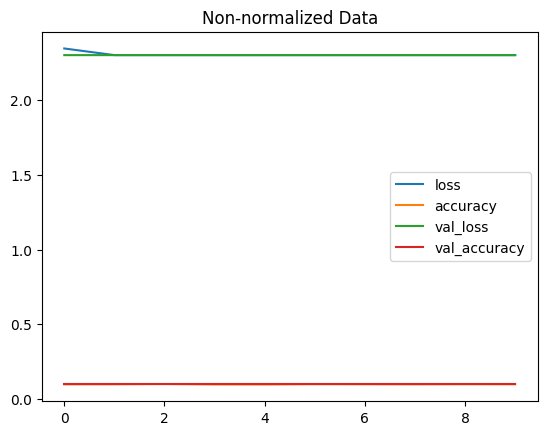

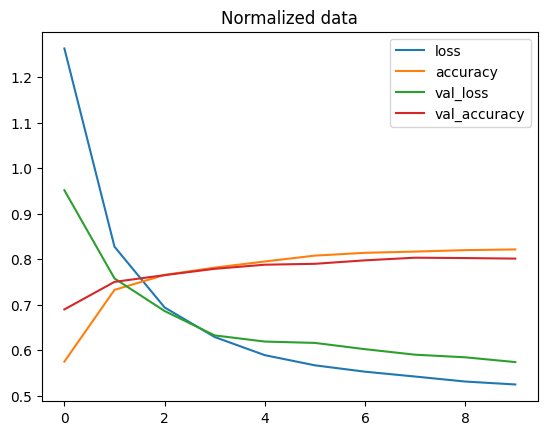

In [39]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [44]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="SparseCategoricalCrossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
                                        lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model.fit(train_data, 
                       train_labels, 
                       epochs=40, 
                       validation_data=(test_data, test_labels),
                       callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2924 - accuracy: 0.5212 - val_loss: 0.9204 - val_accuracy: 0.6826 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8325 - accuracy: 0.7060 - val_loss: 0.7961 - val_accuracy: 0.7074 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7389 - accuracy: 0.7330 - val_loss: 0.7450 - val_accuracy: 0.7163 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6866 - accuracy: 0.7465 - val_loss: 0.6969 - val_accuracy: 0.7431 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6577 - accuracy: 0.7572 - val_loss: 0.6893 - val_accuracy: 0.7426 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6315 - accuracy: 0.7686 - val_loss: 0.6484 - val_accuracy: 0.7664 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

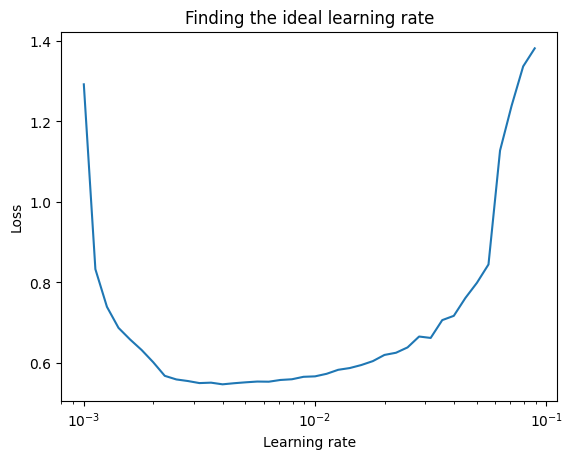

In [46]:
import numpy as np
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [60]:
10**-3, 10**-2

(0.001, 0.01)

In [62]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="SparseCategoricalCrossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # deafult lr
              metrics=["accuracy"])

history = model.fit(train_data, 
                    train_labels, 
                    epochs=20, 
                    validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5691 - accuracy: 0.3690 - val_loss: 1.3761 - val_accuracy: 0.4235
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2226 - accuracy: 0.5172 - val_loss: 1.1193 - val_accuracy: 0.5570
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0689 - accuracy: 0.5680 - val_loss: 1.0409 - val_accuracy: 0.5828
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0112 - accuracy: 0.5915 - val_loss: 0.9910 - val_accuracy: 0.6102
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9188 - accuracy: 0.6703 - val_loss: 0.8655 - val_accuracy: 0.7019
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8256 - accuracy: 0.7121 - val_loss: 0.8292 - val_accuracy: 0.7171
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7900 - accuracy: 0.7236 - val_loss: 0.7937 - val_accuracy: